In [1]:
import numpy as np
import matplotlib.pyplot as plt

from joblib import Parallel, delayed

import multiprocessing
num_cores = multiprocessing.cpu_count()

from scipy.integrate import quad

%matplotlib inline

In [2]:
import TA_gamma as tat

In [3]:
Uinf = 1

In [4]:
c = 1
τ = 0.05

In [5]:
α = np.deg2rad(8.)

In [6]:
A_par = tat.parabolic(τ,c,α)

In [7]:
θ_af = np.logspace(-4,0,num=200,endpoint=True)*np.pi
#θ_eps = np.linspace(5e-2,np.pi,num=200,endpoint=True)
ξ_af = c/2*(1-np.cos(θ_af))
#x_eps = c/2*(1-np.cos(θ))

In [8]:
γ_par1 = tat.γ(θ_af,A_par, Uinf)

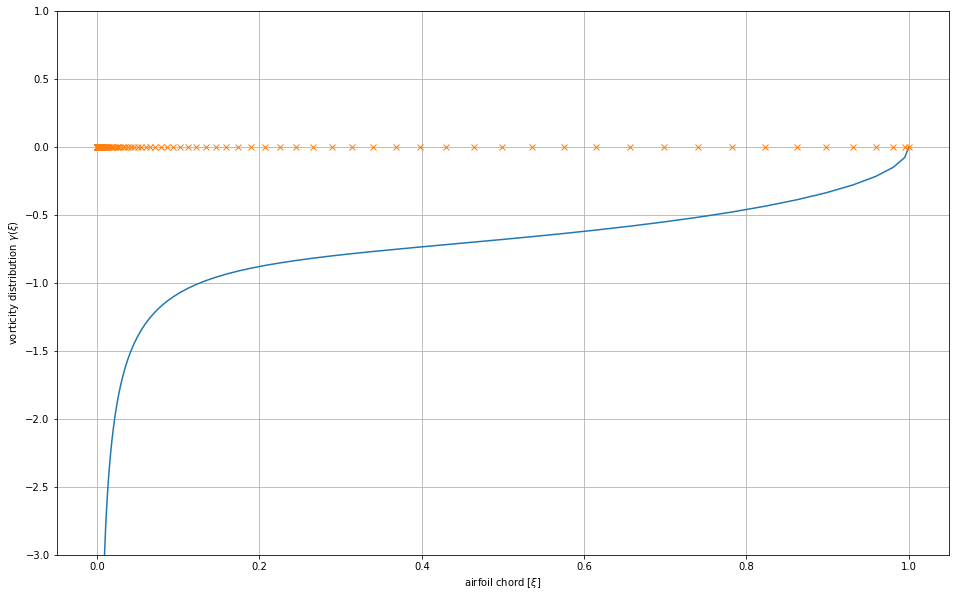

In [9]:
plt.figure(figsize=(16,10))

plt.plot(ξ_af,γ_par1)
if np.abs(γ_par1[0]) > 3:
    plt.ylim([-3,1])
#plt.xlim([0.0,0.02])
plt.plot(ξ_af, np.zeros_like(ξ_af),'x')
plt.xlabel(r'airfoil chord $[\xi]$')
plt.ylabel(r'$\gamma(\xi)$')
plt.title(r'vorticity distribution $\gamma(\xi)$')
plt.grid();

In [10]:
xx = np.linspace(-1, 2, 100)
yy = np.linspace(-1, 1, 100)
xw, yw = np.meshgrid(xx, yy)


In [11]:
uw = np.ones_like(xw)*Uinf*np.cos(α)
vw = np.ones_like(xw)*Uinf*np.sin(α)

nx, ny = xw.shape

for jj in range(ny):
    for ii in range(nx):
        uw[ii,jj] += quad(tat.du,0,c,args=(xw[ii,jj],yw[ii,jj],A_par,Uinf,c))[0]
        vw[ii,jj] += quad(tat.dv,0,c,args=(xw[ii,jj],yw[ii,jj],A_par,Uinf,c))[0]

/opt/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


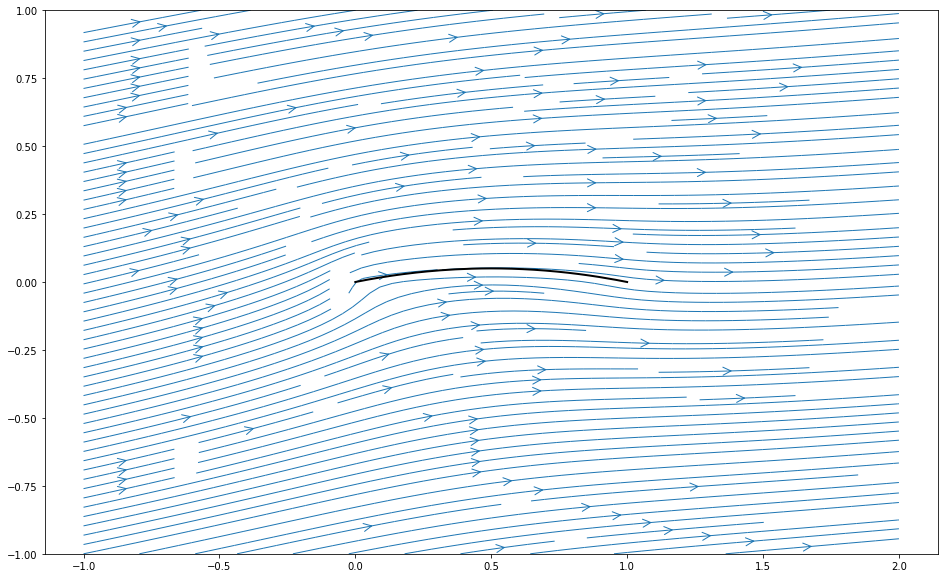

In [12]:
plt.figure(figsize=(16,10))
plt.streamplot(xw, yw, uw, vw, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.plot(ξ_af,4*τ*ξ_af/c*(1-ξ_af/c),'k',lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Streamlines around the airfoil')
plt.axis('equal');

In [13]:
Cp = np.zeros_like(xw)
Cp = 1 - (uw**2+vw**2)/Uinf*2

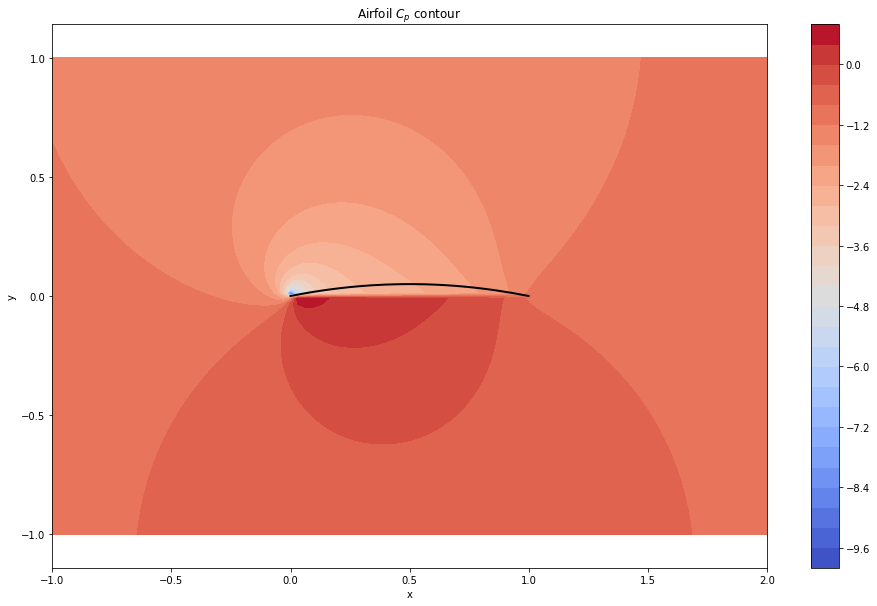

In [14]:
plt.figure(figsize=(16,10))
cm =plt.contourf(xw,yw,Cp,25,cmap='coolwarm')
plt.colorbar(cm)
plt.title('Airfoil $C_p$ contour')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.plot(ξ_af,4*τ*ξ_af/c*(1-ξ_af/c),'k',lw=2)
plt.axis('equal');

In [15]:
#Parallel(n_jobs=nu)(delayed(self.compute_tf)(i, j) for j in column_list for i in row_list)